# Word-Cloud of feelings about this program grouped by countries

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('survey.csv')
data.head()

,Timestamp,In one sentence describe how you feel about this program. (for sentiment analysis),Which programming language are you most comfortable using to make data visualizations?,What is your favorite type of plot to make?,Are you colorblind?,How old are you?,Where are you from?,How difficult is it for you to make a barplot?,What's your favorite visualization package?,How difficult is it for you to make a boxplot?,How difficult is it for you to make a line graph?,How difficult is it for you to make a stacked area graph?,What are you most excited to learn about in this class?,What are you least excited about in this class?,What is one type of plot that you're curious about but haven't made before?,What do you want to get out of this class?,How many hours a week do you expect to spend on hw for this course?,"How interested are you in participating in data visualization competitions (on reddit, kaggle, etc) as part of this course?",How comfortable are you doing a presentation in front of 40-80 people?
0,3/19/19 11:07,.......:),python,NaN,No,23.0,...,1,NaN,1.0,1,2.0,..,presentation,////,...,0.0,1,1
1,3/19/19 11:08,intensive but happy.,Python,Histogram,No,26.0,China,1,NaN,2.0,1,4.0,data visualization with real word applications.,no idea yet,dynamic plotting,to learn what is needed for a data scientist,2.0,5,4
2,3/19/19 11:08,It's intensive and the courses are helpful.,python,Scatterplot,No,28.0,Taiwan,2,NaN,3.0,1,4.0,Create cool visualization,Learn to create amazing visualization from the...,bubble plots,I hope I can visualize data fluently,4.0,5,3
3,3/19/19 11:09,I really enjoy the program and the whole atmos...,Python,Histogram,No,29.0,Russia,2,NaN,3.0,1,4.0,Powerful and easy visualization libraries,not studying JS for data viz,Bubble chart,Getting used to making cool visualizations in ...,4.0,3,4
4,3/19/19 11:09,Stressful,Python,Histogram,No,26.0,China,2,NaN,3.0,1,3.0,Interactive graphs,Assignments,3d visualizations,Data visualization principles,7.0,4,5


In [3]:
data.columns

Index(['Timestamp',
       'In one sentence describe how you feel about this program. (for sentiment analysis)',
       'Which programming language are you most comfortable using to make data visualizations?',
       'What is your favorite type of plot to make?', 'Are you colorblind?',
       'How old are you?', 'Where are you from?',
       'How difficult is it for you to make a barplot?',
       'What's your favorite visualization package?',
       'How difficult is it for you to make a boxplot?',
       'How difficult is it for you to make a line graph?',
       'How difficult is it for you to make a stacked area graph?',
       'What are you most excited to learn about in this class?',
       'What are you least excited about in this class?',
       'What is one type of plot that you're curious about but haven't made before?',
       'What do you want to get out of this class?',
       'How many hours a week do you expect to spend on hw for this course?',
       'How interested are

In [4]:
word_country = data[['In one sentence describe how you feel about this program. (for sentiment analysis)',
                     'Where are you from?']]

In [5]:
word_country['Where are you from?'].value_counts()

China        31
USA          29
India         8
Taiwan        2
Hong Kong     1
Spain         1
Russia        1
Germany       1
Armenia       1
Malaysia      1
Brazil        1
Tunisia       1
...           1
England       1
Peru          1
Neverland     1
Canada        1
Colombia      1
Name: Where are you from?, dtype: int64

In [6]:
china = word_country[word_country['Where are you from?'] == 'China'].iloc[:, 0].tolist()
usa = word_country[word_country['Where are you from?'] == 'USA'].iloc[:, 0].tolist()
india = word_country[word_country['Where are you from?'] == 'India'].iloc[:, 0].tolist()

In [9]:
text_china = " ".join(china).lower()
text_india = " ".join(india).lower()
text_usa = " ".join(usa).lower()

In [10]:
text_china = text_china.replace('program', '')
text_india = text_india.replace('program', '')
text_usa = text_usa.replace('program', '')

In [20]:
china_mask = np.array(Image.open("china.png"))
china_mask = np.array([[min(j) for j in i]for i in china_mask])

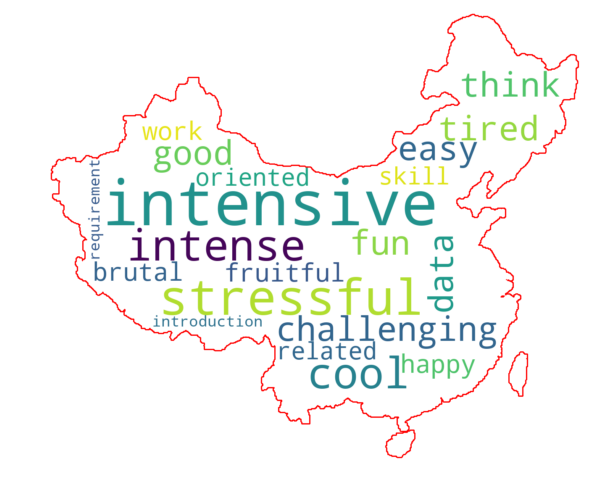

In [53]:
plt.figure(figsize=(10, 10))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", mask=china_mask, max_words=20,
                      contour_width=2, contour_color='red').generate(text_china)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
india_mask = np.array(Image.open("india.png"))
india_mask = np.array([[min(j) for j in i]for i in india_mask])

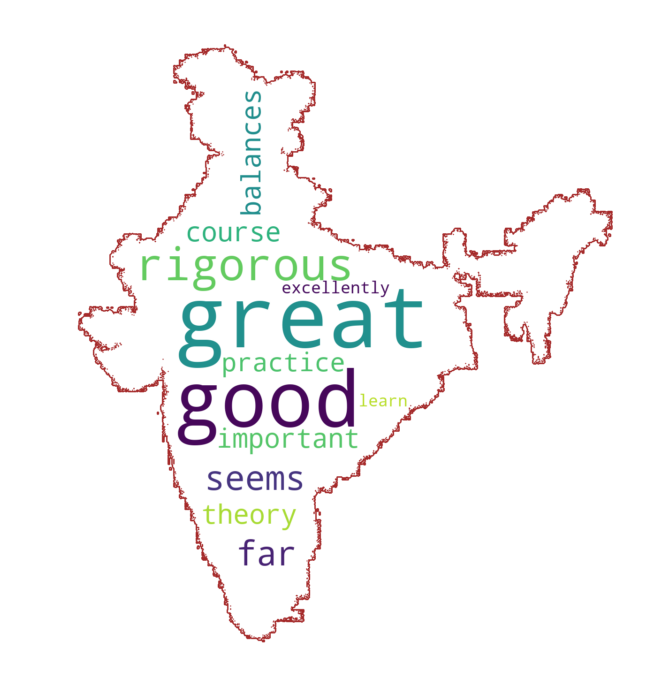

In [51]:
plt.figure(figsize=(12, 12))
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", mask=india_mask, max_words=12,
                      contour_width=2, contour_color='brown').generate(text_india)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
usa_mask = np.array(Image.open("usa.png"))
usa_mask = np.array([[min(j) for j in i]for i in usa_mask])

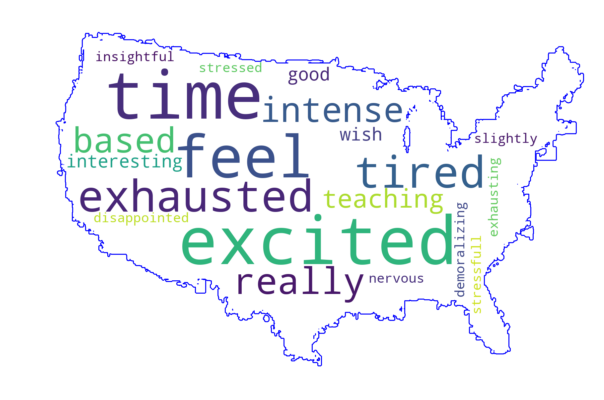

In [52]:
plt.figure(figsize=(10, 10))
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", mask=usa_mask, contour_width=2, 
                      contour_color='blue', max_words=20).generate(text_usa)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()